In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv(
        'C:\Learn\PycharmProjects\domashnee\Work_with_Pandas\\names\yob{}.txt'.format(year),
        names=['Name','Gender','Count']
    )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])

In [23]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()

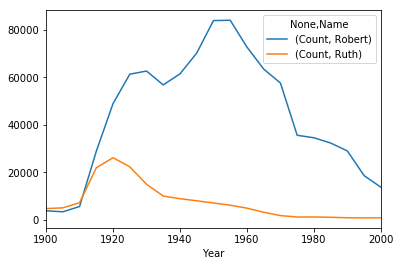

In [24]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

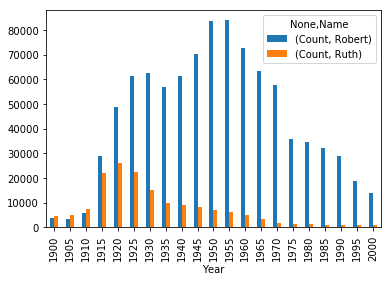

In [25]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

In [26]:
names_by_1950 = pd.read_csv(
        'C:\Learn\PycharmProjects\domashnee\Work_with_Pandas\\names\yob1950.txt',
        names=['Name','Gender','Count']
    )
names_R_for_pie = names_by_1950[(names_by_1950.Name.str.startswith("R"))].head(10)
names_R_for_pie.head(10)

,Name,Gender,Count
35,Rebecca,F,9426
48,Ruth,F,7128
55,Rita,F,6425
68,Rose,F,5373
95,Roberta,F,3632
100,Rosemary,F,3457
124,Rhonda,F,2567
129,Ruby,F,2417
142,Regina,F,2166
148,Robin,F,1992


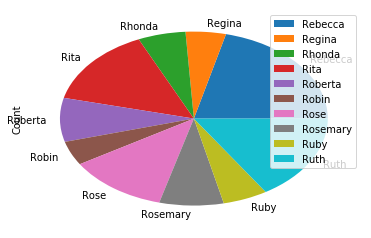

In [27]:
names_R_for_pie.groupby('Name').sum().plot.pie(y='Count')

In [28]:
def count(word):
    consonants = 0
    for letter in word:
        if letter.isalpha():
            if letter.lower() in 'aeiouy':
                continue
            else:
                consonants += 1
    return (consonants)

In [29]:
names_all['Cons'] = names_all.apply(lambda row: count(row.Name), axis=1) 
# names_all

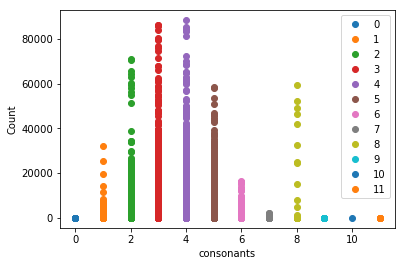

In [30]:
def count_consonants(group):
    plt.plot(group['Cons'], group['Count'], 'o', label=group.name)
    
names_all.groupby('Cons').apply(scatter_len)
plt.xlabel('consonants')
plt.ylabel('Count')
plt.legend()